## Correlation & Redundancy Analysis

#### Loading Packages/Libraries

In [2]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [3]:
install.packages('rpart')
library(rpart)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


#### Reading Data

In [2]:
boston <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data')

In [3]:
features <- c('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV')
colnames(boston) <- features

In [4]:
boston$MEDV <- NULL #drop the target column

In [5]:
#removing non-continuous factors
boston$ZN <- NULL #binary
boston$CHAS <- NULL #factor

In [7]:
head(boston)
dim(boston) # we removed 3 columns

CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
0.02985,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


[1] 506  11

### Calculating $R^2$

$R^2$ values are obtained by dropping a feature and using K-neighbors regression to see how well the other features can predict it.
An $R^2$ value of close to one means that the other features have good predictive value in identifying that feature. This means that there is a strong correlation, or that the feature is redundant.

In [6]:
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

In [9]:
calculate_r_2_for_feature(boston,'CRIM')

[1] 0.5027195

In [10]:
print(paste("CRIM: ", calculate_r_2_for_feature(boston,'CRIM')))
print(paste("INDUS: ", calculate_r_2_for_feature(boston,'INDUS')))
print(paste("NOX: ", calculate_r_2_for_feature(boston,'NOX')))
print(paste("RM: ", calculate_r_2_for_feature(boston,'RM')))
print(paste("AGE: ", calculate_r_2_for_feature(boston,'AGE')))
print(paste("DIS: ", calculate_r_2_for_feature(boston,'DIS')))
print(paste("RAD: ", calculate_r_2_for_feature(boston,'RAD')))
print(paste("TAX: ", calculate_r_2_for_feature(boston,'TAX')))
print(paste("PTRATIO: ", calculate_r_2_for_feature(boston,'PTRATIO')))
print(paste("B: ", calculate_r_2_for_feature(boston,'B')))
print(paste("LSTAT: ", calculate_r_2_for_feature(boston,'LSTAT')))

[1] "CRIM:  0.352113840792654"
[1] "INDUS:  0.900414874887472"
[1] "NOX:  0.854887200862081"
[1] "RM:  0.532952348427327"
[1] "AGE:  0.645257464077056"
[1] "DIS:  0.759765390763613"
[1] "RAD:  0.959023972242768"
[1] "TAX:  0.904444201761545"
[1] "PTRATIO:  0.759011493017502"
[1] "B:  0.385342539378136"
[1] "LSTAT:  0.633918746703802"


In [11]:
mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:100) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    
    return (mean(scores))
}

In [12]:
print(paste("CRIM: ", mean_r2_for_feature(boston,'CRIM')))
print(paste("INDUS: ", mean_r2_for_feature(boston,'INDUS')))
print(paste("NOX: ", mean_r2_for_feature(boston,'NOX')))
print(paste("RM: ", mean_r2_for_feature(boston,'RM')))
print(paste("AGE: ", mean_r2_for_feature(boston,'AGE')))
print(paste("DIS: ", mean_r2_for_feature(boston,'DIS')))
print(paste("RAD: ", mean_r2_for_feature(boston,'RAD')))
print(paste("TAX: ", mean_r2_for_feature(boston,'TAX')))
print(paste("PTRATIO: ", mean_r2_for_feature(boston,'PTRATIO')))
print(paste("B: ", mean_r2_for_feature(boston,'B')))
print(paste("LSTAT: ", mean_r2_for_feature(boston,'LSTAT')))

[1] "CRIM:  0.329832142888065"
[1] "INDUS:  0.854941035660057"
[1] "NOX:  0.822413977883945"
[1] "RM:  0.373025769913533"
[1] "AGE:  0.68488561599154"
[1] "DIS:  0.813345288549677"
[1] "RAD:  0.897104535772595"
[1] "TAX:  0.898196132518983"
[1] "PTRATIO:  0.814182760412738"
[1] "B:  0.132729684842257"
[1] "LSTAT:  0.561630561195"


In [13]:
print(paste("CRIM: ", mean_r2_for_feature(boston,'CRIM')))
print(paste("INDUS: ", mean_r2_for_feature(boston,'INDUS')))
print(paste("NOX: ", mean_r2_for_feature(boston,'NOX')))
print(paste("RM: ", mean_r2_for_feature(boston,'RM')))
print(paste("AGE: ", mean_r2_for_feature(boston,'AGE')))
print(paste("DIS: ", mean_r2_for_feature(boston,'DIS')))
print(paste("RAD: ", mean_r2_for_feature(boston,'RAD')))
print(paste("TAX: ", mean_r2_for_feature(boston,'TAX')))
print(paste("PTRATIO: ", mean_r2_for_feature(boston,'PTRATIO')))
print(paste("B: ", mean_r2_for_feature(boston,'B')))
print(paste("LSTAT: ", mean_r2_for_feature(boston,'LSTAT')))

[1] "CRIM:  0.324104377218349"
[1] "INDUS:  0.854253731051152"
[1] "NOX:  0.824401593924147"
[1] "RM:  0.362783939730045"
[1] "AGE:  0.671940796671928"
[1] "DIS:  0.803328896084787"
[1] "RAD:  0.904005284851327"
[1] "TAX:  0.901750837720422"
[1] "PTRATIO:  0.819721755580504"
[1] "B:  0.100637908121088"
[1] "LSTAT:  0.566733697504459"


### Correlation Pairplot

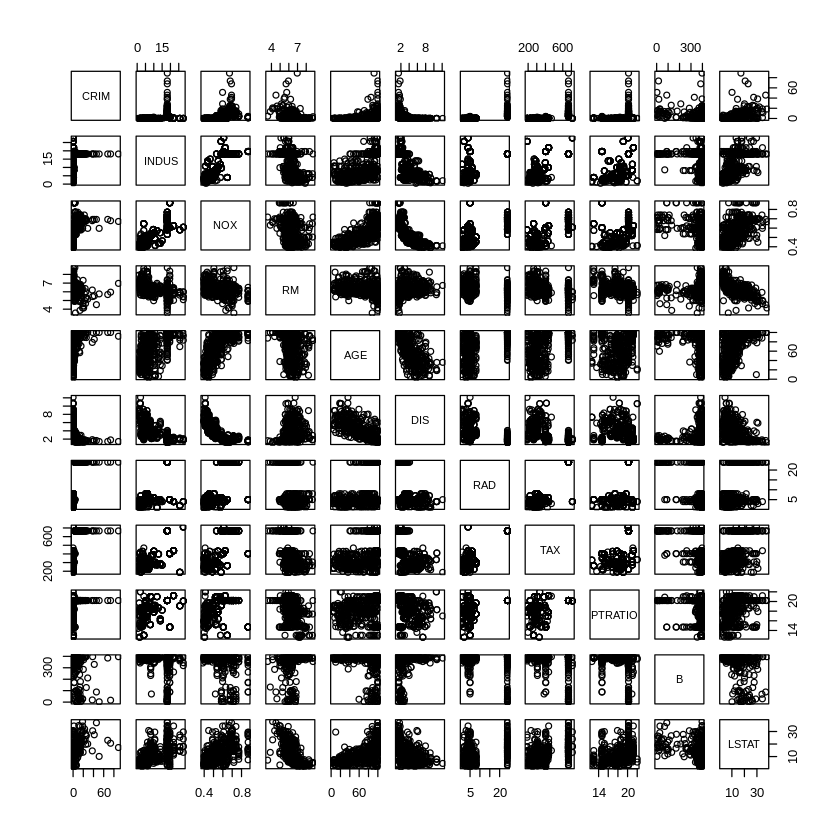

In [14]:
pairs(boston)

In [15]:
cor(boston)

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000000,0.4065834,0.4209717,-0.2192467,0.3527343,-0.3796701,0.6255051,0.5827643,0.2899456,-0.3850639,0.4556215
INDUS,0.4065834,1.0000000,0.7636514,-0.3916759,0.6447785,-0.7080270,0.5951293,0.7207602,0.3832476,-0.3569765,0.6037997
NOX,0.4209717,0.7636514,1.0000000,-0.3021882,0.7314701,-0.7692301,0.6114406,0.6680232,0.1889327,-0.3800506,0.5908789
RM,-0.2192467,-0.3916759,-0.3021882,1.0000000,-0.2402649,0.2052462,-0.2098467,-0.2920478,-0.3555015,0.1280686,-0.6138083
AGE,0.3527343,0.6447785,0.7314701,-0.2402649,1.0000000,-0.7478805,0.4560225,0.5064556,0.2615150,-0.2735340,0.6023385
DIS,-0.3796701,-0.7080270,-0.7692301,0.2052462,-0.7478805,1.0000000,-0.4945879,-0.5344316,-0.2324705,0.2915117,-0.4969958
RAD,0.6255051,0.5951293,0.6114406,-0.2098467,0.4560225,-0.4945879,1.0000000,0.9102282,0.4647412,-0.4444128,0.4886763
TAX,0.5827643,0.7207602,0.6680232,-0.2920478,0.5064556,-0.5344316,0.9102282,1.0000000,0.4608530,-0.4418080,0.5439934
PTRATIO,0.2899456,0.3832476,0.1889327,-0.3555015,0.2615150,-0.2324705,0.4647412,0.4608530,1.0000000,-0.1773833,0.3740443
B,-0.3850639,-0.3569765,-0.3800506,0.1280686,-0.2735340,0.2915117,-0.4444128,-0.4418080,-0.1773833,1.0000000,-0.3660869


The pairplot plots each feature against each other. Looking at the general shape of the plots can reveal which features are corrleated with each other. Plots with strong linear relationships will also show high $r^2$ values. 

### Correlation Heatmap

In [16]:
library(reshape2)
cormat = cor(boston)

In [17]:
cormat[lower.tri(cormat)] <- NA

In [18]:
melted_cormat <- melt(cormat, na.rm = T)

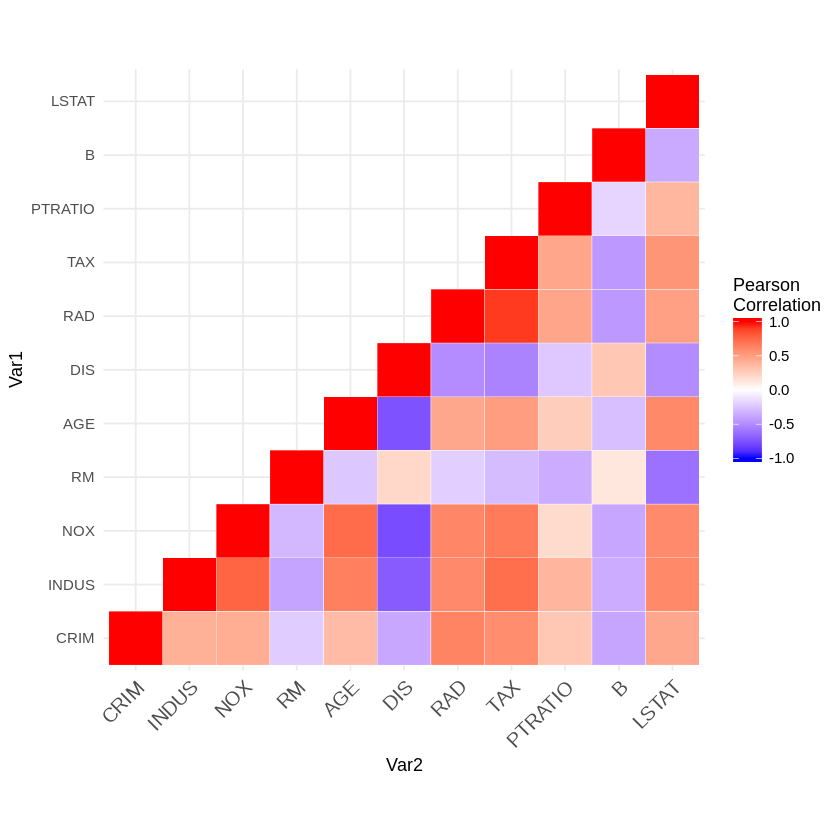

In [19]:
library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

Values close to $+1$ indicate a strong positive relationship, while values close to $-1$ indicate a strong negative relationship between the two features. 

For instance, `TAX` and `RAD` show a strong positive correlation with an $r^2$ = `0.9102282`. 

On the other hand, `DIS` is negatively correlated with `AGE` and `NOX` with $r^2$ values of `-0.7692301` and `-0.7478805`, respectively. 